In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import warnings

warnings.filterwarnings("ignore")

#load dataset
df = pd.read_csv("Metabolic Syndrome.csv")

In [2]:
df.dtypes

seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome      int64
dtype: object

In [3]:
#drop columns without numeric values
df = df.select_dtypes(exclude=["object"])
df = df.drop("seqn", axis=1)
#take out lines with missing values
df = df.dropna()

Text(0.5, 1.0, 'UMAP projection of the Patients for Metabolic Syndrome suspicion')

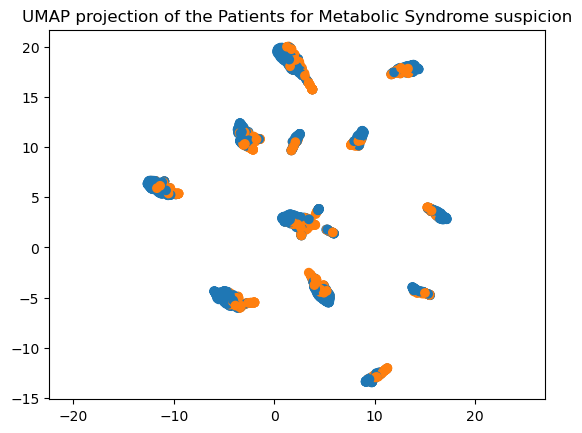

In [4]:
#initialize Normalizer
STD = MinMaxScaler()
std_df = STD.fit_transform(df)
#initialize the mapper
mapper = umap.UMAP(random_state=42)

#train the mapper
transformed_df = mapper.fit_transform(df)

plt.scatter(
    transformed_df[:,0],
    transformed_df[:,1],
    c = [sns.color_palette()[index] for index in df["MetabolicSyndrome"]],
    )

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Patients for Metabolic Syndrome suspicion')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


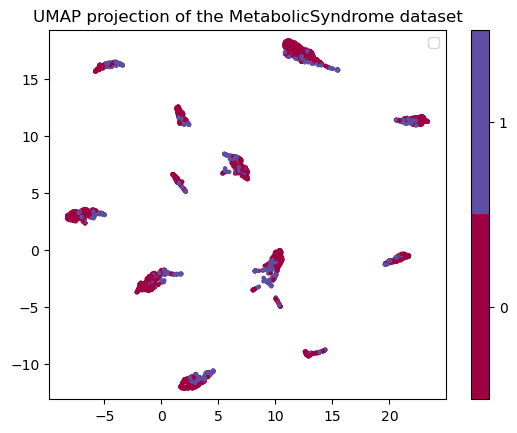

In [5]:
#initialize a new UMAP reducer
reducer = umap.UMAP(random_state=42)
reducer.fit(df)

embedding = reducer.transform(df)
assert(np.all(embedding == reducer.embedding_))

plt.scatter(embedding[:, 0], embedding[:, 1], c=df["MetabolicSyndrome"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(0, 3)-0.5).set_ticks([0,1])
plt.title('UMAP projection of the MetabolicSyndrome dataset', fontsize=12)
plt.legend()

# Outlier detection with UMAP

<Axes: >

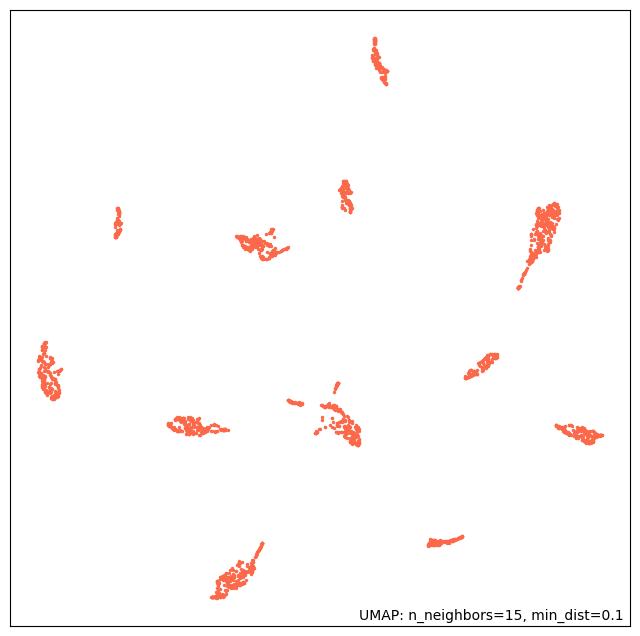

In [6]:
#initialize training data and output
import umap.plot


X = df.drop("MetabolicSyndrome", axis=1)
Y = df["MetabolicSyndrome"]

#extract the elements with a density factor different from what expected.
#Here we extract the top 5% of the factors awkwards toward the distribution of the data in X.
outlier_scores = LocalOutlierFactor(contamination=0.05).fit_predict(X)
outlying_df= X[outlier_scores == -1]

#naive plotting
mapper = umap.UMAP().fit(X)
umap.plot.points(mapper, theme='red')


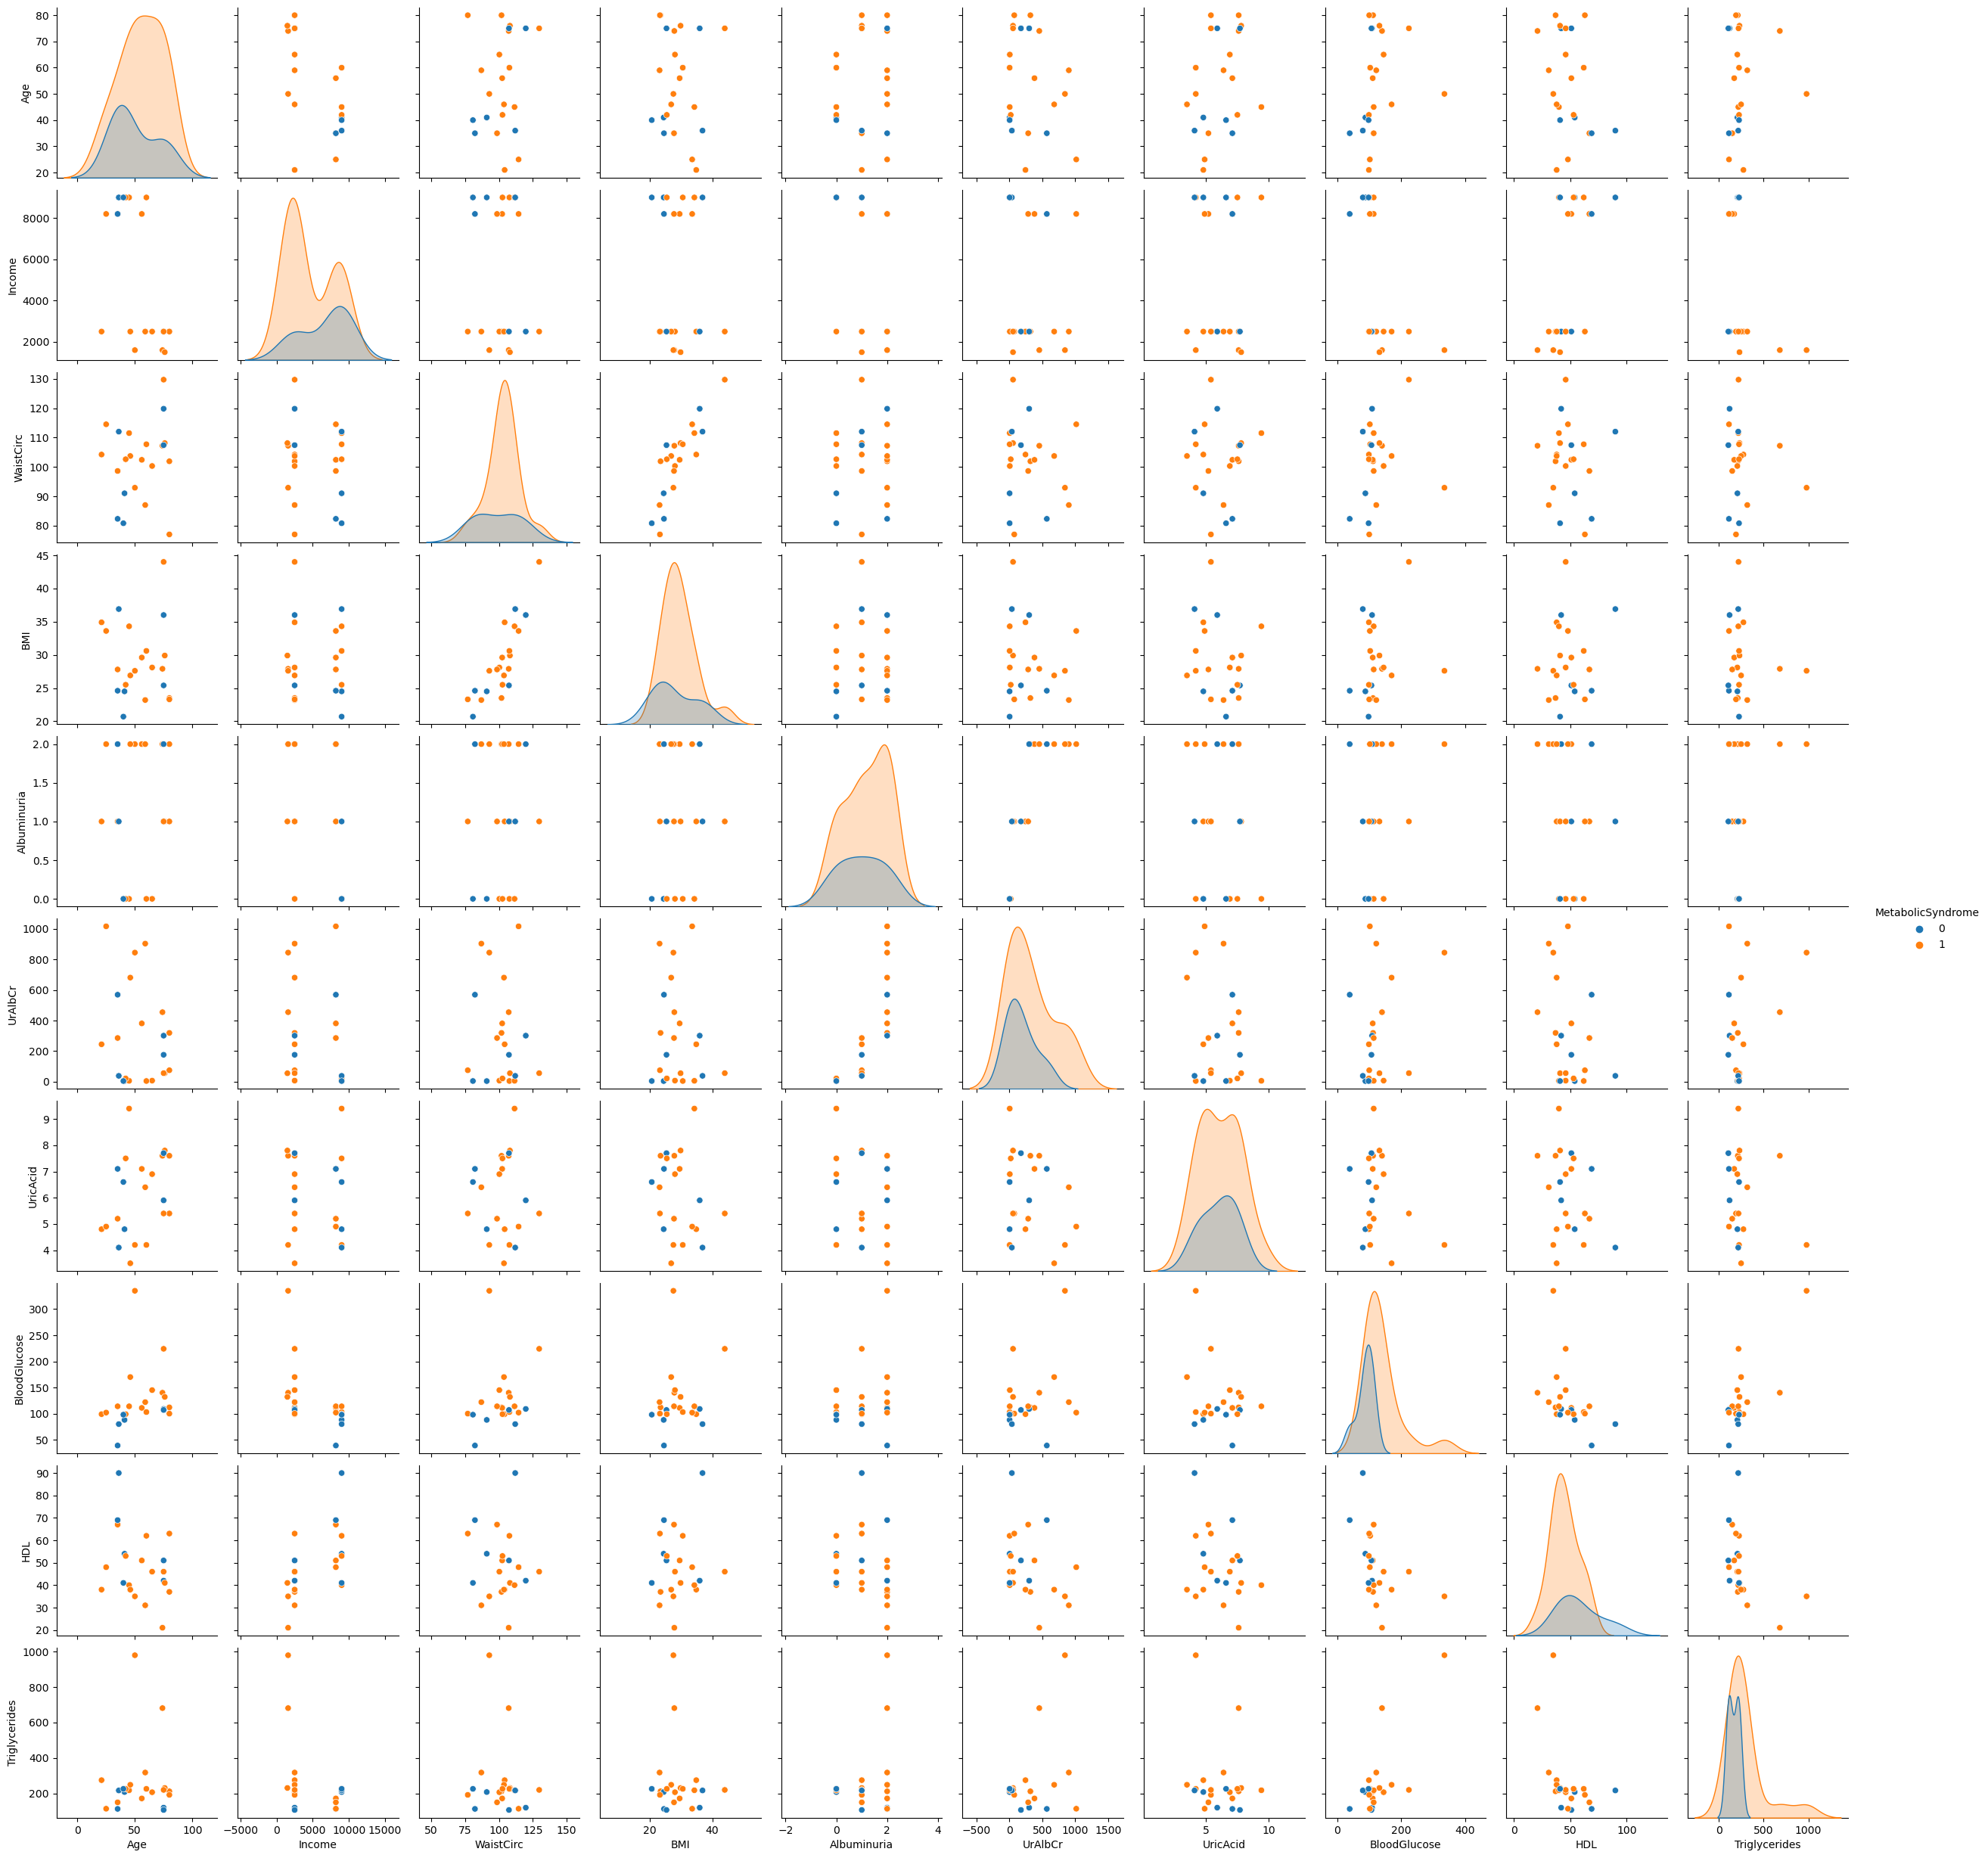

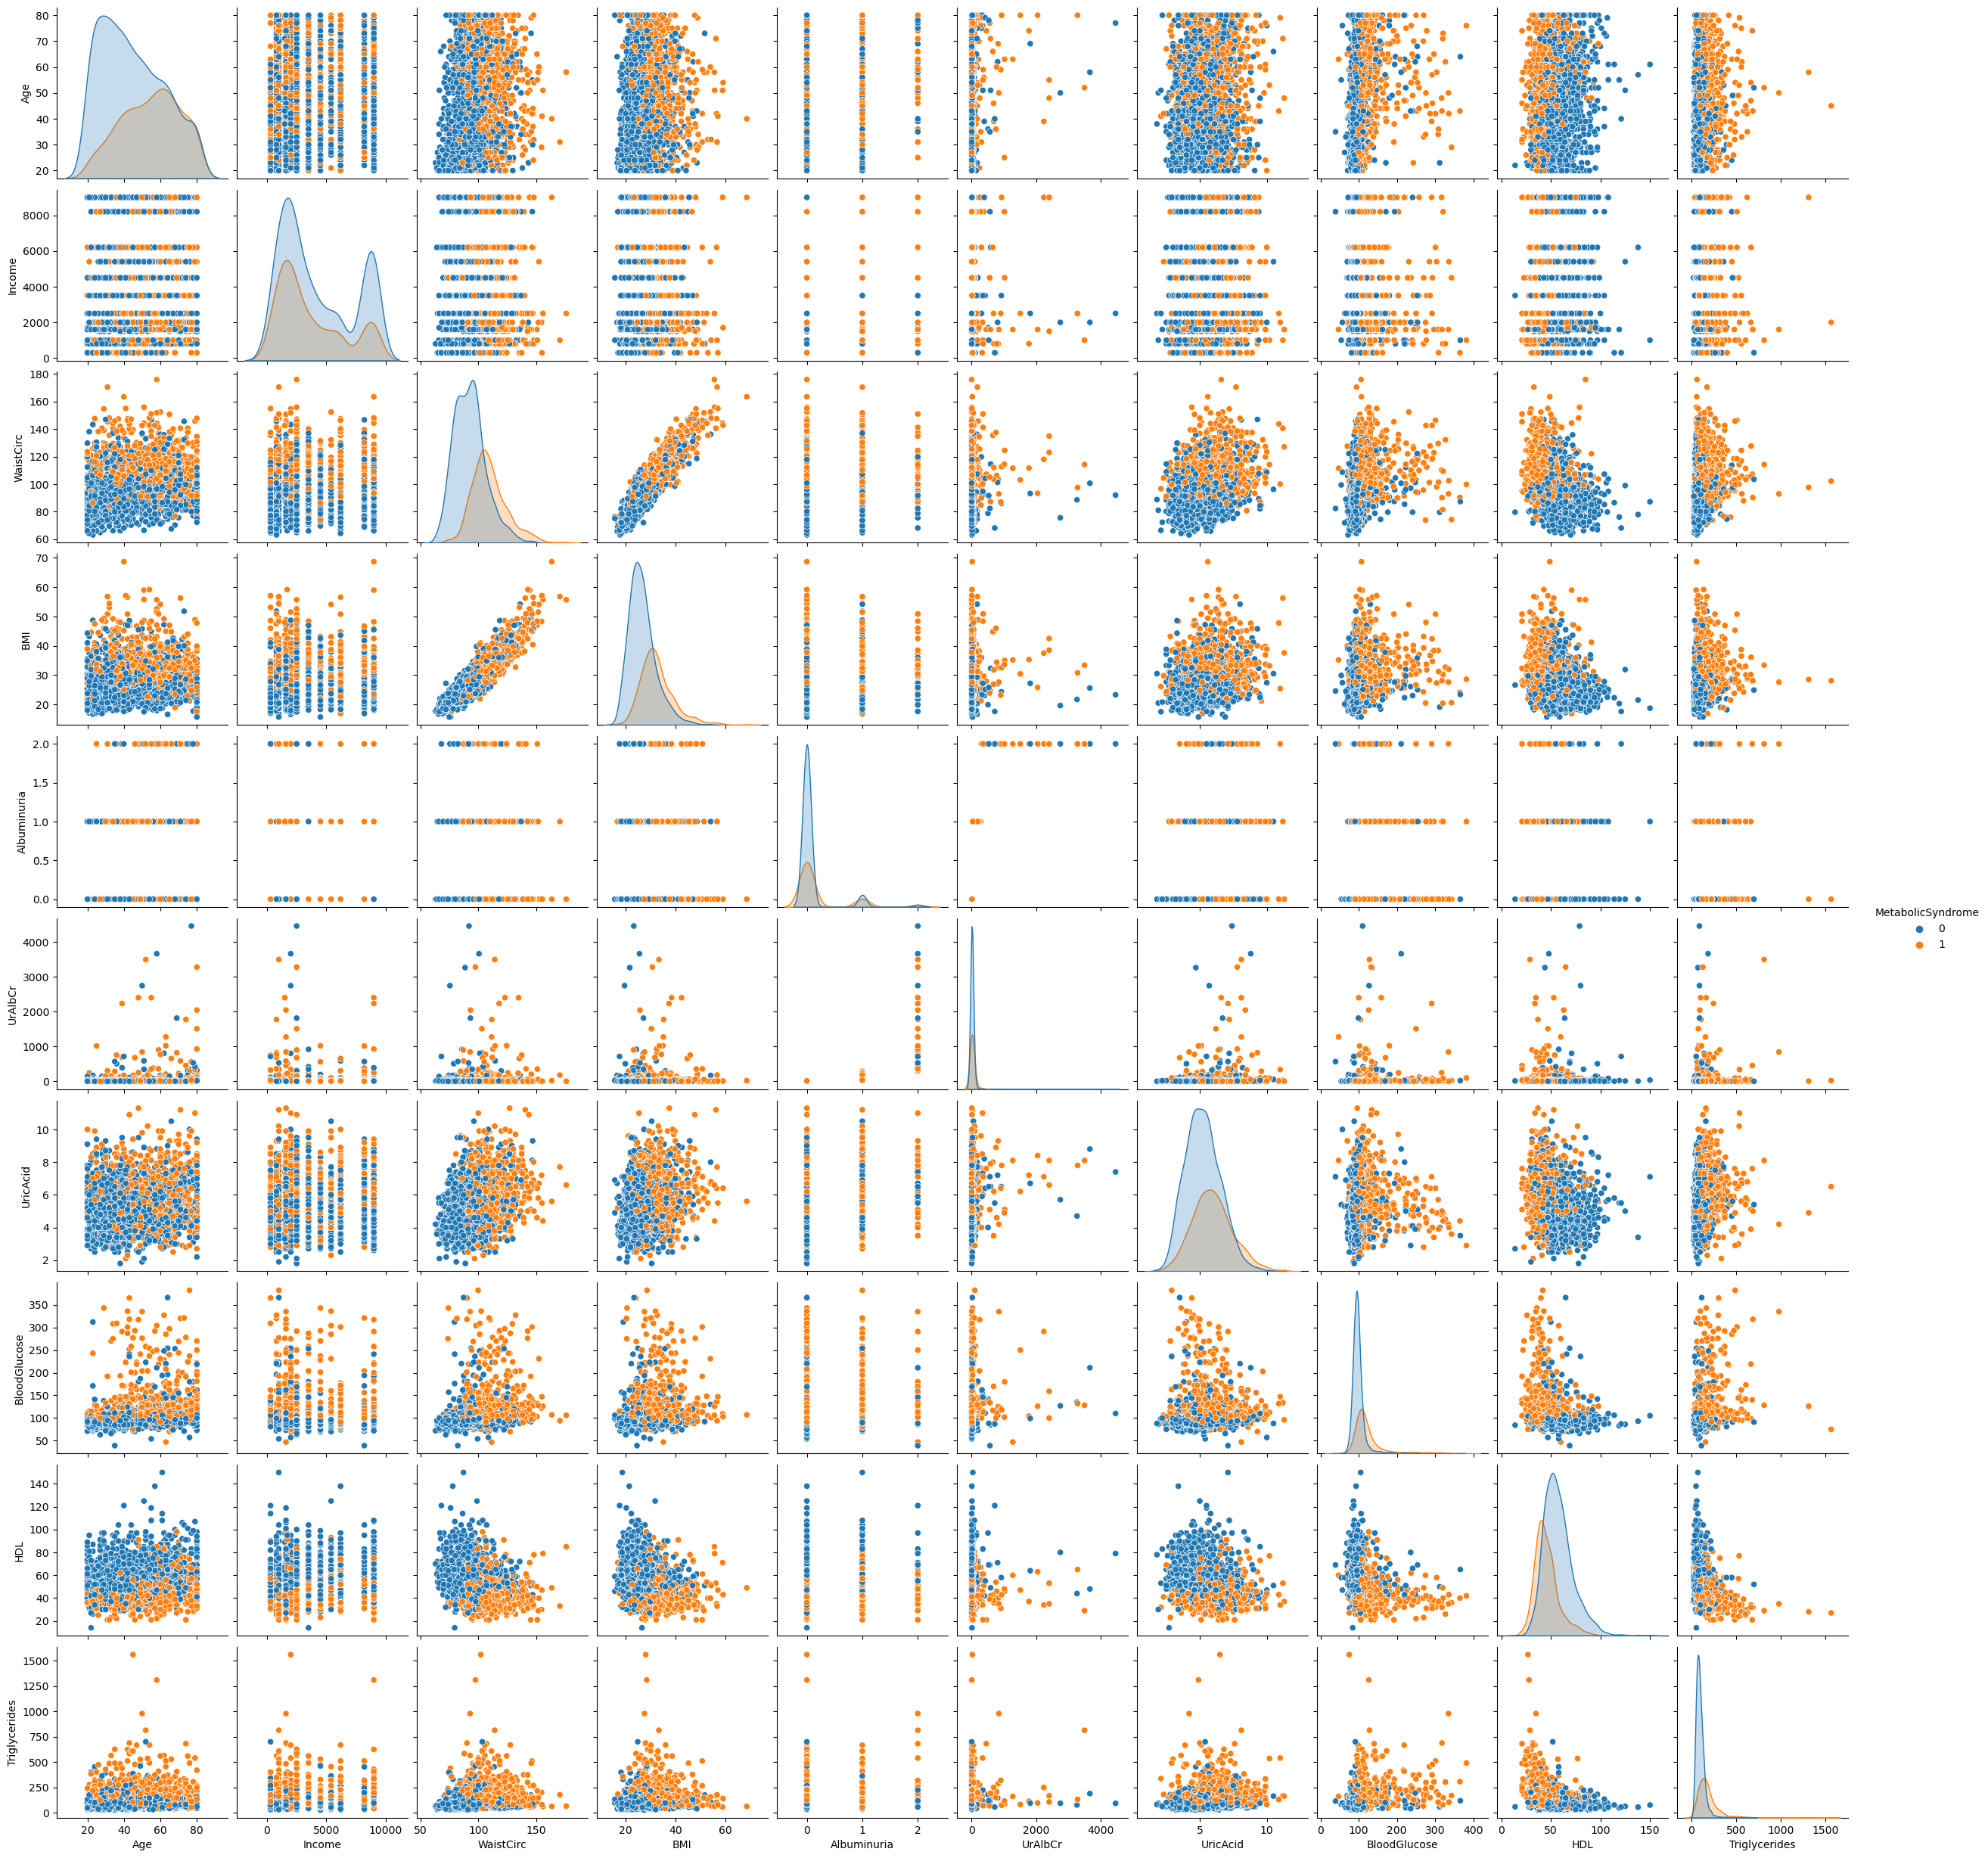

In [7]:
outlier_scores = LocalOutlierFactor(contamination=0.01).fit_predict(mapper.embedding_)
outlying_df2 = X[outlier_scores == -1] 
outlying_df2["MetabolicSyndrome"] = Y[outlying_df2.index]
sns.pairplot(outlying_df2, hue="MetabolicSyndrome")

sns.pairplot(df, hue="MetabolicSyndrome")